In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



In [2]:
def load_image(filepath, size=(16, 16)):
    img = Image.open(filepath).convert('L')  # Grayscale
    img = img.resize(size, Image.Resampling.LANCZOS)
    img_array = np.array(img)
    return img_array
def normalize_image(image, bits=3):
    max_val = 2**bits - 1
    return np.round((image / 255) * max_val).astype(int)


In [3]:
image = np.loadtxt("normalized_image.txt", dtype=int)

# 2. Convert to 8-bit values if necessary (e.g., from 0–7 to 0–255)
if image.max() <= 7:
    image = (image * (255 // image.max())).astype(np.uint8)
else:
    image = image.astype(np.uint8)

# 3. Make sure it's 2D (grayscale)
assert image.ndim == 2, "Expected a 2D grayscale image array"

# 4. Resize to 32x32
img = Image.fromarray(image, mode='L')  # 'L' = 8-bit grayscale
img = img.resize((32, 32), Image.Resampling.LANCZOS)

image = normalize_image(image, bits=3)

# 5. Save to PNG
img.save("square.png")
print("Saved as batman32x32.png")

Saved as batman32x32.png


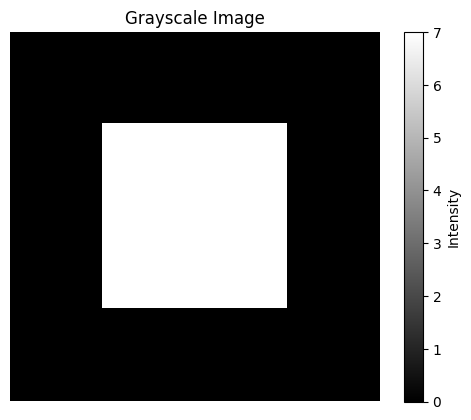

In [4]:
plt.imshow(image, cmap='gray', interpolation='nearest')
plt.colorbar(label='Intensity')
plt.title('Grayscale Image')
plt.axis('off')  # Hide axis ticks
plt.show()
